In [ ]:
# Sử dụng các thư viện sau để train mô hình
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tải lên
%cd"/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN KHUON MAT/"

/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN KHUON MAT


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tải bộ dữ liệu training set
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN KHUON MAT/Training_set",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 80 images belonging to 2 classes.


In [ ]:
# Xem các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'CO': 0, 'KHONG': 1}

In [ ]:
# Tạo ra dữ liệu đầu vào và đầu ra từ bộ dữ liệu training set
x_train,y_train=next(training_set)

In [ ]:
# Xem số hàng và số cột của dữ liệu train 
print(x_train.shape)
print(y_train.shape)


(32, 150, 150, 3)
(32, 2)


In [ ]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(32,67500)
x_train=x_train.astype ('float32')
x_train=x_train/255

In [ ]:
# Xem số hàng và số cột của dữ liệu train sau khi biến đổi
print(x_train.shape)
print(y_train.shape)

(32, 67500)
(32, 2)


In [ ]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 67500 tín hiệu vào và có 16 tín hiệu ra sử dụng hàm relu
model.add(Dense(16,activation='relu',input_shape=(67500,)))
# Tạo lớp ẩn thứ hai với 4 tín hiệu vào và có 32 tín hiệu ra sử dụng hàm relu
model.add(Dense(32,activation='relu'))
# Tạo lớp ẩn thứ ba với 32 tín hiệu vào và có 64 tín hiệu ra sử dụng hàm relu
model.add(Dense(64,activation='relu'))
# Tạo lớp ẩn thứ tư với 64 tín hiệu vào, 2 tín hiệu ra ra sử dụng hàm softmax
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                1080016   
                                                                 
 dense_49 (Dense)            (None, 32)                544       
                                                                 
 dense_50 (Dense)            (None, 64)                2112      
                                                                 
 dense_51 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,082,802
Trainable params: 1,082,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch mô hình
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
#Train mô hình với 500 lần học (epochs), mỗi lần học 10 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ␣ dừng việc train
history=model.fit(x_train,y_train,epochs=500, batch_size=10,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/500
3/3 [==============================] - 1s 93ms/step - loss: 0.6780 - accuracy: 0.4400 - val_loss: 0.8533 - val_accuracy: 0.1429
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6258 - accuracy: 0.6800 - val_loss: 0.8597 - val_accuracy: 0.1429
Epoch 3/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6435 - accuracy: 0.6800 - val_loss: 0.8933 - val_accuracy: 0.1429
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5982 - accuracy: 0.6800 - val_loss: 0.9177 - val_accuracy: 0.1429
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5814 - accuracy: 0.6800 - val_loss: 1.0066 - val_accuracy: 0.1429
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.5641 - accuracy: 0.6800 - val_loss: 0.8605 - val_accuracy: 0.1429
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5560 - accuracy: 0.6800 - val_loss: 1.0641 - val_accuracy: 0.1429
Epoch 8/500
3/3 [===

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 3.725290076417309e-09
Train Accuracy 1.0


<function matplotlib.pyplot.show>

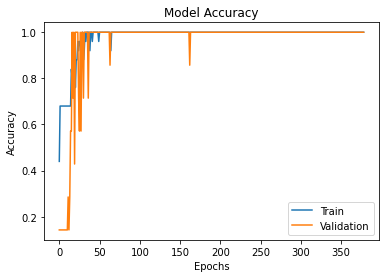

In [ ]:
# Vẽ đồ thị giữa Epochs và Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("NHAN DIEN KHUON MAT.h5")

In [ ]:
# Tải mô hình 
model_ANN=load_model('NHAN DIEN KHUON MAT.h5')

KHONG


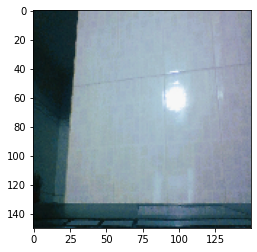

In [ ]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN KHUON MAT/Test_set/KT4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
KQ=np.argmax(model_ANN.predict(img),axis=1)
if KQ==0:
  prediction="CO "
if KQ==1:
  prediction="KHONG"
print(prediction)


CO 


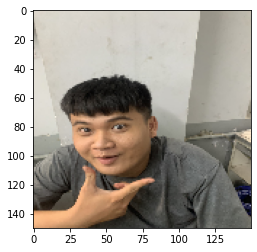

In [ ]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN KHUON MAT/Test_set/GiangT2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
KQ=np.argmax(model_ANN.predict(img),axis=1)
if KQ==0:
  prediction="CO "
if KQ==1:
  prediction="KHONG"
print(prediction)


In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NHAN DIEN NGUOI.ipynb')